In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Question 8: Convolution Operation

In Convolutional Neural Networks (CNNs) used in computer vision, a **feature map**, also known as an **activation map**, is a two-dimensional array or grid of numbers resulting from the application of **convolutional filters** (also called **kernels**) to an input image or a previous layer's feature map.

In [4]:
def convolve(input_image, filters):
  """
  Performs convolution operation for two-dimensional and three-dimensional inputs.

  Args:
    input_image:  A numpy array of shape (H, W, D) representing the input image,
                  where H and W are the height, width and depth of the input repsectively.

    filters:  A numpy array of shape (FH, FW, FD, F) representing the filters,
              where FH, FW and FD are the filter height, width and depth respectively,
              and F is the number of filters.
              Note that the filter depth must match the depth of the input image.

  Returns:
    A numpy array of shape (H_out, W_out, K) representing the convolved feature maps,
    where H_out and W_out are the output height and width.
  """

  # Get the shape of the input image and filters
  (input_height, input_width, input_depth) = input_image.shape
  (filter_height, filter_width, filter_depth, num_filters) = filters.shape

  # Ensure the depth of the filters matches the depth of the input image
  assert input_depth == filter_depth, "Filter depth must match input depth."

  # Output dimensions after convolution
  output_height = input_height - filter_height + 1
  output_width = input_width - filter_width + 1

  # Initialize the output feature maps (one for each filter)
  output = np.zeros((output_height, output_width, num_filters))

  # Perform convolution
  for f in range(num_filters):  # Iterate over each filter
      current_filter = filters[:, :, :, f]  # Get the current filter
      for i in range(output_height):
          for j in range(output_width):
              # Extract the current region of interest
              region = input_image[i:i + filter_height, j:j + filter_width, :] # e.g. region = input_image[0:3, 0:3, :]
              # Perform element-wise multiplication and sum up
              output[i, j, f] = np.sum(region * current_filter)

  return output

## Example Usage of Convolution Operation

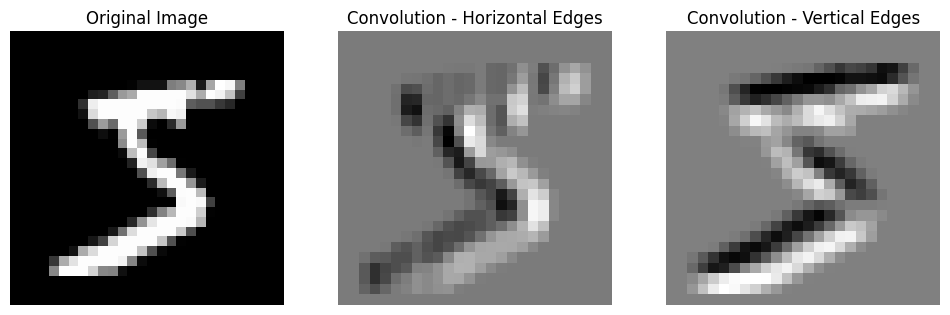

In [11]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Select a sample image (reshape to add a third dimension)
sample_image = train_images[0].reshape((28, 28, 1))  # Convert to 3D (height, width, depth)

# Define two 3x3 filters for horizontal and vertical edge detection
horizontal_filter = np.array([[[1], [0], [-1]],
                              [[1], [0], [-1]],
                              [[1], [0], [-1]]])

vertical_filter = np.array([[[1], [1], [1]],
                            [[0], [0], [0]],
                            [[-1], [-1], [-1]]])

# Stack the filters to create a 3D filter array
filters = np.stack([horizontal_filter, vertical_filter], axis=-1) # filters shape (3,3,1,2)

# Apply convolution using the convolve function
output_convolved = convolve(sample_image, filters) # output_convolved shape (26, 26, 2)

# Display the original and convolved images
plt.figure(figsize=(12, 4))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Convolved Image with Horizontal Edge Detection
plt.subplot(1, 3, 2)
plt.imshow(output_convolved[:, :, 0], cmap='gray')
plt.title('Convolution - Horizontal Edges')
plt.axis('off')

# Convolved Image with Vertical Edge Detection
plt.subplot(1, 3, 3)
plt.imshow(output_convolved[:, :, 1], cmap='gray')
plt.title('Convolution - Vertical Edges')
plt.axis('off')

plt.show()


# Question 9: ReLU Activation Function

In [ ]:
def relu(feature_map):
  """
  Applies rectified linear unit (ReLU) activation to an input feature map.

  Args:
      feature_map: A numpy array of any shape representing a feature map.

  Returns:
      A numpy array with the same shape as the input, where each element
      has been replaced by its maximum value of zero or the original value.
  """
  return np.maximum(0, feature_map)

## Example Usage of ReLU Activation Function

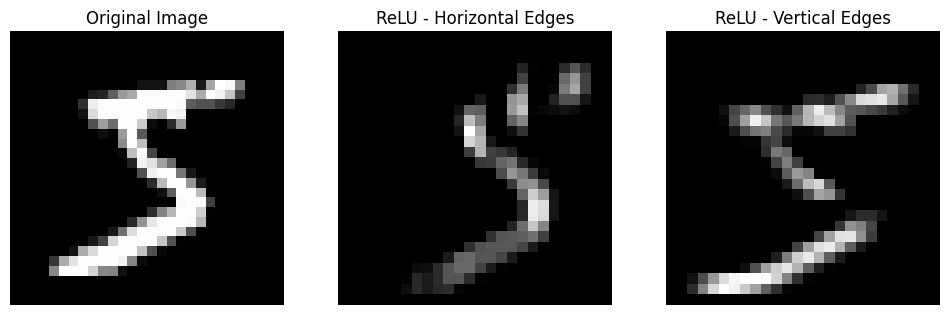

In [ ]:
# Apply ReLU to the convolved image from Question 8
relu_output = relu(output_convolved) # relu_output shape (26, 26, 2)

# Display the original and convolved images
plt.figure(figsize=(12, 4))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Convolved Image with Horizontal Edge Detection
plt.subplot(1, 3, 2)
plt.imshow(relu_output[:, :, 0], cmap='gray')
plt.title('ReLU - Horizontal Edges')
plt.axis('off')

# Convolved Image with Vertical Edge Detection
plt.subplot(1, 3, 3)
plt.imshow(relu_output[:, :, 1], cmap='gray')
plt.title('ReLU - Vertical Edges')
plt.axis('off')

plt.show()

# Question 10: Max Pooling

In [ ]:
def max_pooling(feature_map, pool_size):
  """
  Performs max pooling on a feature map with a specified pool size.

  Args:
      feature map: A numpy array of shape (H, W, F) representing the feature map.
      pool_size: A tuple (PH, PW) representing the size of the pooling window.

  Returns:
      A numpy array of shape (H_out, W_out, F) representing the pooled feature maps.
  """

  # Get the shape of the feature map and and the
  (input_height, input_width, num_filters) = feature_map.shape
  (pool_height, pool_width) = pool_size

  # Output dimensions after pooling
  output_height = input_height // pool_height # floor division e.g. 5 // 2 = 2
  output_width = input_width // pool_width

  # Initialize the output pooled feature map
  max_pooling_output = np.zeros((output_height, output_width, num_filters))

  # Perform max pooling
  for f in range(num_filters):
    for i in range(output_height):
      for j in range(output_width):
        patch = feature_map[i*pool_height:i*pool_height+pool_height, j*pool_width:j*pool_width+pool_width, f]
        max_pooling_output[i, j, f] = np.max(patch)

  return max_pooling_output

## Example usage of max pooling

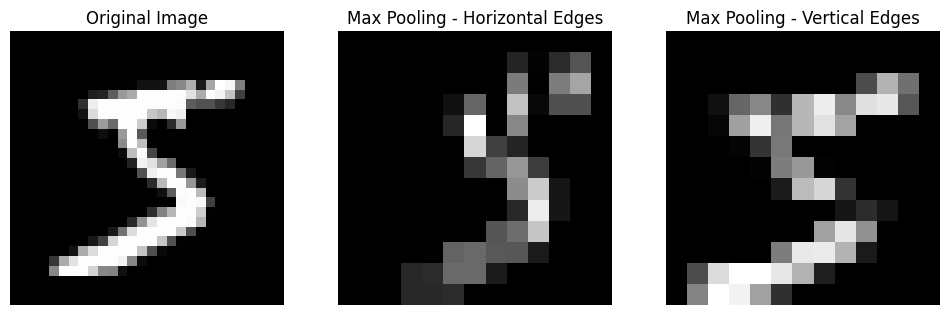

In [ ]:
# Apply Max Pooling to the ReLU output with a 2x2 kernel
pooled_output = max_pooling(relu_output, (2, 2)) # pooled_output shape (13,13,2)

# Display the original and convolved images
plt.figure(figsize=(12, 4))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Convolved Image with Horizontal Edge Detection
plt.subplot(1, 3, 2)
plt.imshow(pooled_output[:, :, 0], cmap='gray')
plt.title('Max Pooling - Horizontal Edges')
plt.axis('off')

# Convolved Image with Vertical Edge Detection
plt.subplot(1, 3, 3)
plt.imshow(pooled_output[:, :, 1], cmap='gray')
plt.title('Max Pooling - Vertical Edges')
plt.axis('off')

plt.show()

# Question 11: Normalization

In [ ]:
def normalize(feature_map):
  """
  Normalizes a feature map to have zero mean and unit variance.

  Args:
      feature_map: A numpy array of any shape.

  Returns:
      A numpy array with the same shape as the input, where each element
      has been normalized.
  """
  # mean = np.mean(feature_map)
  # std = np.std(feature_map)

  # axis=(0, 1) will compute the mean along the first and second axes (rows and columns of each 2D slice),
  # effectively collapsing them and computing the mean for each "channel" (depth).
  mean = np.mean(feature_map, axis=(0, 1), keepdims=True) # mean shape (1, 1, 2)
  std = np.std(feature_map, axis=(0, 1), keepdims=True) # std shape (1, 1, 2)

  normalized_feature_map = (feature_map - mean) / std # feature_map shape (13, 13, 2)
  # normalized_feature_map = (feature_map - mean) / (std + 1e-7)  # Adding a small value to avoid division by zero

  return normalized_feature_map

## Example usage of Normalization

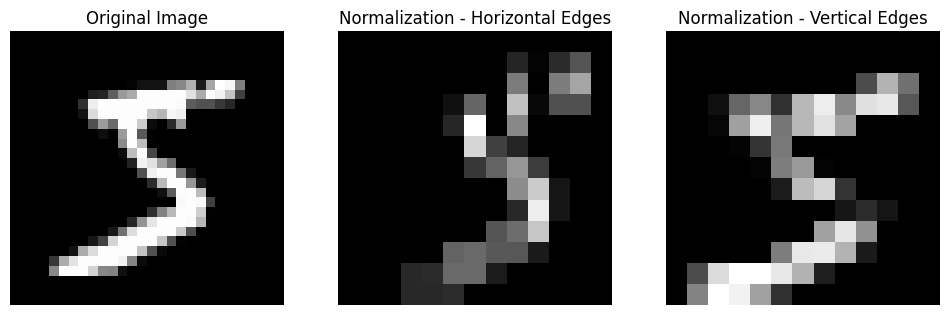

In [ ]:
# Apply normalization to the pooled output
normalized_output = normalize(pooled_output) # normalized_output shape (13, 13, 2)

# Display the original and convolved images
plt.figure(figsize=(12, 4))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Convolved Image with Horizontal Edge Detection
plt.subplot(1, 3, 2)
plt.imshow(normalized_output[:, :, 0], cmap='gray')
plt.title('Normalization - Horizontal Edges')
plt.axis('off')

# Convolved Image with Vertical Edge Detection
plt.subplot(1, 3, 3)
plt.imshow(normalized_output[:, :, 1], cmap='gray')
plt.title('Normalization - Vertical Edges')
plt.axis('off')

plt.show()

# Question 12: Fully-Connected Layer

In [ ]:
def fully_connected_layer(input_feature_map, weights):
  """
  Performs a fully-connected layer operation.

  Args:
    input_feature_map: A numpy array of shape (N,).
    weights: A numpy array of shape (N,) representing the weights.

  Returns:
    A numpy array of shape (N,) representing the output activations.
  """
  # Flatten the input feature map
  flattened_input = input_feature_map.flatten() # flattened_input shape: (338,) since 338=13*13*2 which was the shape of the normalized output

  # Assert shapes for multiplication
  assert flattened_input.shape[0] == weights.shape[0], "Input feature map and weight shapes are incompatible."

  # Perform matrix multiplication with weights
  output = np.dot(flattened_input, weights)

  return output

## Example Usage of Fully Connected Layer

In [ ]:
# Example weights for a fully connected layer
weights = np.random.rand(np.prod(normalized_output.shape), 10)  # weights shape: (338, 10) meaning 10 output nodes

# Apply fully connected layer to normalized output
fc_output = fully_connected_layer(normalized_output, weights) # fc_output shape (10,)
print("Output after fully connected layer:", fc_output)


Output after fully connected layer: [ 3.11564408 -3.21581529  4.40595951  2.94910981 -7.85246816  0.91030622
  5.21334788  4.37050014  3.95651345 -3.88277572]


# Question 13: Softmax Activation Function

In [ ]:
def softmax(input_vector):
  """
  Applies softmax activation to an input vector.

  Args:
    input_vector: A numpy array of shape (N,) representing the input vector.

  Returns:
    A numpy array of shape (N,) representing the normalized probabilities.
  """
  # Subtracting the maximum value from the input vector in the softmax function
  # is a numerical stability trick. This is done to prevent potential overflow
  # issues when computing the exponentials.
  # exp_values  = np.exp(input_vector - np.max(input_vector))

  exp_values  = np.exp(input_vector)
  return exp_values  / np.sum(exp_values)

### Example Usage of Softmax

In [ ]:
# Apply softmax to the output of the fully connected layer
probabilities = softmax(fc_output)
print("Output after softmax:", probabilities)

Output after softmax: [5.11074860e-02 9.09424503e-05 1.85721161e-01 4.32672813e-02
 8.81239384e-07 5.63272384e-03 4.16395191e-01 1.79250998e-01
 1.18486657e-01 4.66776969e-05]


In [ ]:
# Print the maximum probability
max_probability = np.max(probabilities)
max_index = np.argmax(probabilities)

print("Maximum probability:", max_probability)
print("Index of maximum probability:", max_index)

Maximum probability: 0.41639519096132493
Index of maximum probability: 6
